## Importando cosas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Soluciones

### Punto 1: límites fijos

In [177]:
# Domain: r and theta
ri, rf = 0, 2
ti, tf = 0, 2*np.pi/3

# Parametres
dr, dt = 0.1, 0.1
n = 20000          # Iterations
default_val = 0    # Filling up the space

In [183]:
def laplace_polar(ri, rf, ti, tf, dr, dt, lim_ti, lim_tf, lim_rf, default_val, n):
    theta, r = np.meshgrid(np.arange(ti,tf+dt,dt),np.arange(ri,rf+dr,dr))
    phi = np.full(theta.shape, default_val)

    phi[:,-1] = lim_rf(r[:,-1])
    phi[1,:], phi[-1,:] = lim_ti(theta[1]), lim_tf(theta[-1])

    for x in range(n):
        for i in range(1, r.shape[0]-1):
            for j in range(1, theta.shape[1]-1):
                phi[i, j] = ((phi[i+1, j]+phi[i-1, j])/(2*dr**2) + (phi[i, j+1]+phi[i, j-1])/(2*(i*dr*dt)**2) + (phi[i+1, j] - phi[i-1, j])/(2*i*dr**2))/(1/dr**2 + 1/(i*dr*dt)**2)


    return theta, r, phi

In [186]:
# Conditions and limits
lim_ti = lambda theta: 0          # Theta = 0
lim_tf = lambda r: 100        # Theta = tf
lim_rf = lambda r: 100        # r = rf

theta0, r0, phi0 = laplace_polar(ri, rf, ti, tf, dr, dt, lim_ti, lim_tf, lim_rf, default_val, n)

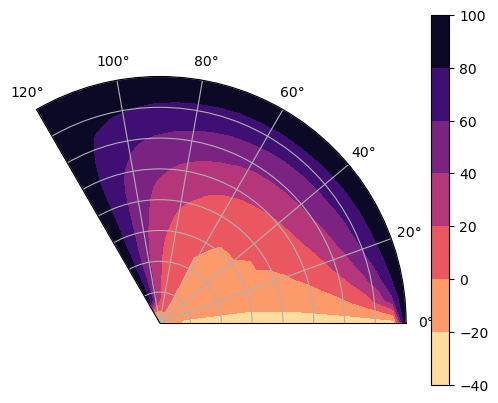

In [187]:
ax = plt.subplot(111, polar=True)
ax.set_yticklabels([])
ctf = ax.contourf(theta0, r0, phi0, cmap=cm.magma_r)
plt.colorbar(ctf)
plt.axis([ti,tf,ri,rf])
plt.show()

In [184]:
# Conditions and limits
lim_ti = lambda theta: 100*np.sin(4*np.pi*(theta - ti)/(tf - ti))
lim_tf = lambda r: -100*np.sin(2*np.pi*(r - ri)/(rf - ri))
lim_rf = lambda r: 100*np.sin(2*np.pi*(r - ri)/(rf - ri))
default_val = -30

theta1, r1, phi1 = laplace_polar(ri, rf, ti, tf, dr, dt, lim_ti, lim_tf, lim_rf, default_val, n)

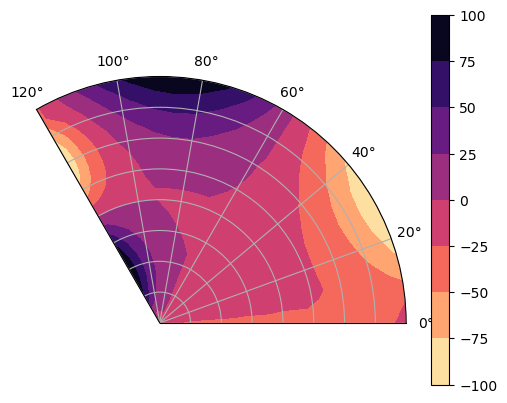

In [185]:
ax = plt.subplot(111, polar=True)
ax.set_yticklabels([])
ctf = ax.contourf(theta1, r1, phi1, cmap=cm.magma_r)
plt.colorbar(ctf)
plt.axis([ti,tf,ri,rf])
plt.show()